In [1]:
from IPython.display import HTML # for producing html output in the notebook

import numpy as np # efficient number manipulation in Python

# Various libraries and settings necessary for plotting
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patheffects as path_effects

fig_size = [12, 9]
plt.rcParams["figure.figsize"] = fig_size
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Machine learning and data set generation
import sklearn as sk
from sklearn import datasets # for the moons and circles data sets
from sklearn import svm # SVM training
from sklearn.neural_network import MLPClassifier # ANNs with back-propogation
from sklearn import tree # Decision trees
from sklearn.ensemble import RandomForestClassifier # Random forests
import graphviz # visualising decision trees

In [2]:
def plot_data(ax, training, testing, clf = None, clf_type='sklearn'):
    (training_points, training_labels) = training
    (testing_points, testing_labels) = testing
    points = np.concatenate((training_points, testing_points))
    if clf is not None:
        min_x = np.min(np.transpose(points)[0]) - 0.5
        max_x = np.max(np.transpose(points)[0]) + 0.5
        min_y = np.min(np.transpose(points)[1]) - 0.5
        max_y = np.max(np.transpose(points)[1]) + 0.5
        xx, yy = np.meshgrid(np.arange(min_x, max_x, 0.02),
                         np.arange(min_y, max_y, 0.02))
        
        if clf_type == 'sklearn':
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        elif clf_type == 'ann':
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] 

        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)
        
    ax.scatter(x = np.transpose(training_points)[0],
               y = np.transpose(training_points)[1],
               c=training_labels, cmap=cm_bright)
    ax.scatter(x = np.transpose(testing_points)[0],
               y = np.transpose(testing_points)[1],
               c=testing_labels, alpha=0.3, cmap=cm_bright)
    
    if clf is not None:
        score = 0
        
        if clf_type == 'sklearn' or clf_type == 'ann':
            score = clf.score(testing_points, testing_labels)
            
        ax.text(xx.max() - 0.2, yy.min() + 0.2, ('{0:.2f}'.format(score)),
           size=34, horizontalalignment='right', color='white', 
                path_effects=[path_effects.Stroke(linewidth=1, foreground='black')])

In [3]:
(points, labels) = datasets.make_moons(n_samples = 150)
training_moon_p = points[0:100:1]; training_moon_l = labels[0:100:1]
testing_moon_p = points[100:150:1]; testing_moon_l = labels[100:150:1]

In [4]:
(points, labels) = datasets.make_circles(n_samples = 250, shuffle=True, noise=None)
training_circ_p = points[0:150:1]; training_circ_l = labels[0:150:1]
testing_circ_p = points[150:250:1]; testing_circ_l = labels[150:250:1]

In [5]:
def load_spirals():
    data = np.loadtxt('data/two-spirals.csv', delimiter=',')
    
    # shuffle the data set (so that training and testing are not "in order")
    # with a reproducable random seed
    np.random.seed(12345) 
    np.random.shuffle(data)
    
    points = np.transpose(np.array((np.transpose(data)[0], np.transpose(data)[1])))
    labels = np.transpose(data)[2]
    return (points, labels)

In [6]:
(points, labels) = load_spirals()
training_spir_p = points[0:120:1]; training_spir_l = labels[0:120:1]
testing_spir_p = points[120:194:1]; testing_spir_l = labels[120:194:1]

# Decision Trees

Decision trees reach a decision by performing a number of tests on the attributes (components of **x**), with branches representing value of attributes and leaves representing decision returned by the tree

In [7]:
clf = tree.DecisionTreeClassifier(random_state=12345)
clf.fit(training_moon_p, training_moon_l)
HTML('<h3> Testing data accuracy: ' + str(clf.score(testing_moon_p, testing_moon_l)) + '</h3>')

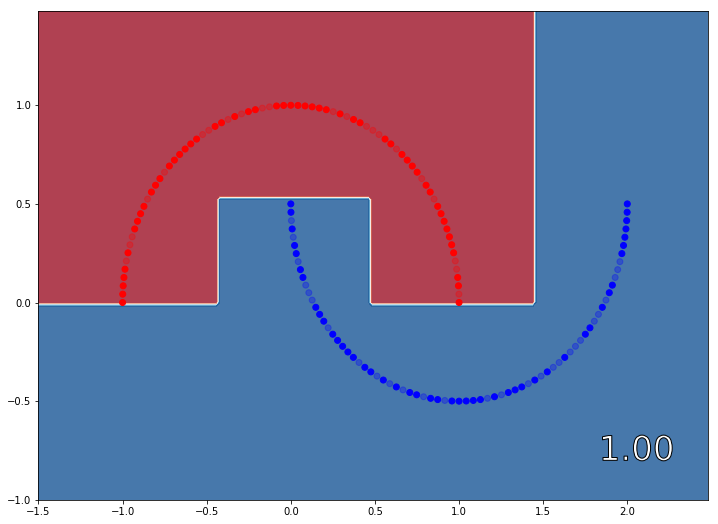

In [8]:
fig, ax = plt.subplots()
plot_data(ax, 
          (training_moon_p, training_moon_l), 
          (testing_moon_p, testing_moon_l), clf, 'ann')

In [9]:
dtree = tree.export_graphviz(clf, out_file=None,
                            feature_names=['x', 'y'],
                            class_names = ['red', 'blue'],
                            filled=True, rounded=True,
                            special_characters=True)
graph = graphviz.Source(dtree)

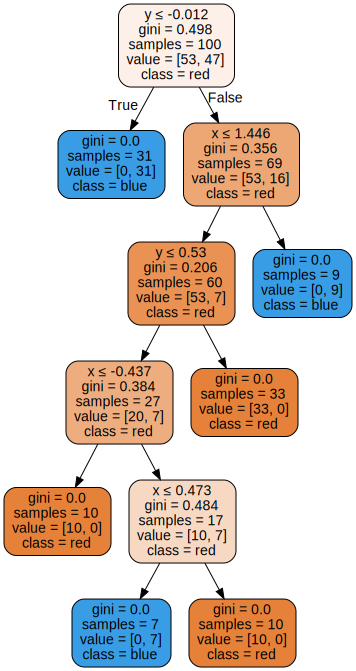

In [10]:
graph

In [11]:
clf = tree.DecisionTreeClassifier(random_state=12345)
clf.fit(training_circ_p, training_circ_l)
HTML('<h3> Testing data accuracy: ' + str(clf.score(testing_circ_p, testing_circ_l)) + '</h3>')

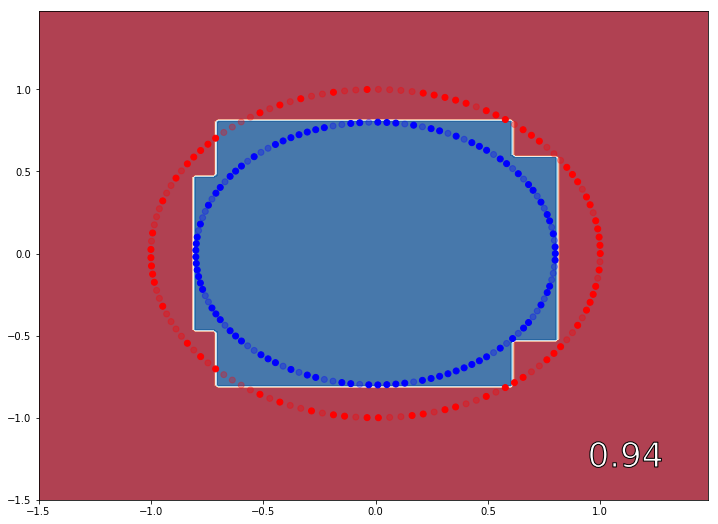

In [12]:
fig, ax = plt.subplots()
plot_data(ax, 
          (training_circ_p, training_circ_l), 
          (testing_circ_p, testing_circ_l), clf, 'ann')

In [13]:
clf = tree.DecisionTreeClassifier(random_state=12345)
clf.fit(training_spir_p, training_spir_l)
HTML('<h3> Testing data accuracy: ' + str(clf.score(testing_spir_p, testing_spir_l)) + '</h3>')

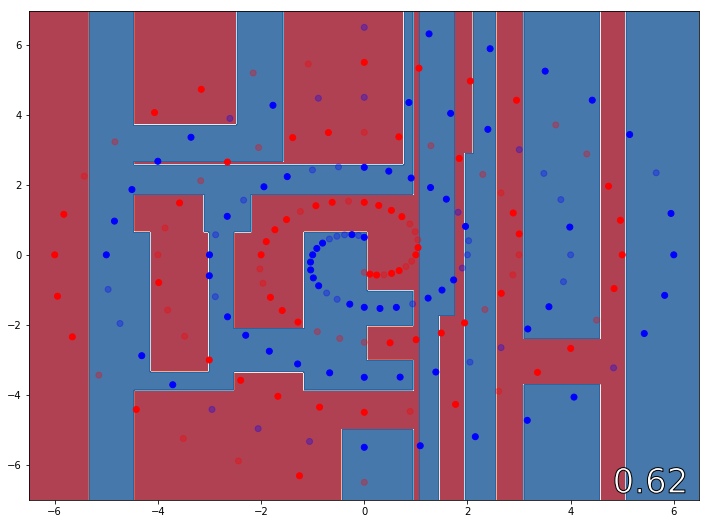

In [14]:
fig, ax = plt.subplots()
plot_data(ax, 
          (training_spir_p, training_spir_l), 
          (testing_spir_p, testing_spir_l), clf, 'ann')

In [15]:
def summary_dtree():
    fig, axes = plt.subplots(2,3)

    fig.set_figwidth(14)

    clf = svm.SVC(gamma='auto', C=100.0, random_state=12345)
    clf.fit(training_circ_p, training_circ_l)
    plot_data(axes[0,1], (training_circ_p, training_circ_l), (testing_circ_p, testing_circ_l), clf)
    axes[0,1].set_title("Radial-basis SVM, circles")

    clf = svm.SVC(gamma='auto', C=100.0, random_state=12345)
    clf.fit(training_moon_p, training_moon_l)
    plot_data(axes[0,0], (training_moon_p, training_moon_l), (testing_moon_p, testing_moon_l), clf)
    axes[0,0].set_title("Radial-basis SVM, moons")

    clf = svm.SVC(gamma='auto', C=100.0, random_state=12345)
    clf.fit(training_spir_p, training_spir_l)
    plot_data(axes[0,2], (training_spir_p, training_spir_l), (testing_spir_p, testing_spir_l), clf)
    axes[0,2].set_title("Radial-basis SVM, spirals")
    
    clf = tree.DecisionTreeClassifier(random_state=12345)
    clf.fit(training_moon_p, training_moon_l)
    plot_data(axes[1,0], (training_moon_p, training_moon_l), (testing_moon_p, testing_moon_l), clf, 'ann')
    axes[1,0].set_title("Decision Tree, moons")
    
    clf = tree.DecisionTreeClassifier(random_state=12345)
    clf.fit(training_circ_p, training_circ_l)
    plot_data(axes[1,1], (training_circ_p, training_circ_l), (testing_circ_p, testing_circ_l), clf, 'ann')
    axes[1,1].set_title("Decision Tree, circles")

    clf = tree.DecisionTreeClassifier(random_state=12345)
    clf.fit(training_spir_p, training_spir_l)
    plot_data(axes[1,2], (training_spir_p, training_spir_l), (testing_spir_p, testing_spir_l), clf, 'ann')
    axes[1,2].set_title("Decision Tree, spirals")
    
    for ax1 in axes:
        for ax in ax1:
            ax.set_xticks(())
            ax.set_yticks(())

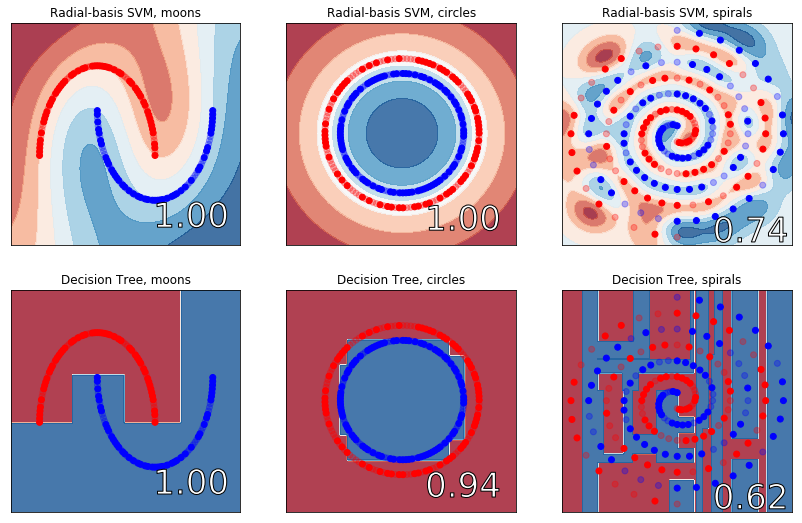

In [16]:
summary_dtree()

# Hybrid and Multi-Classifier Systems

Multiple classifiers can also be combined together, either in parallel or sequentially, in order to achieve higher combined accuracy than that of the individual classifiers.

![Hybrid System Diagram](img/hybrids.png)

In [17]:
def summary_forest():
    fig, axes = plt.subplots(2,3)

    fig.set_figwidth(14)
    
    clf = tree.DecisionTreeClassifier(random_state=12345)
    clf.fit(training_moon_p, training_moon_l)
    plot_data(axes[0,0], (training_moon_p, training_moon_l), (testing_moon_p, testing_moon_l), clf, 'ann')
    axes[0,0].set_title("Decision Tree, moons")
    
    clf = tree.DecisionTreeClassifier(random_state=12345)
    clf.fit(training_circ_p, training_circ_l)
    plot_data(axes[0,1], (training_circ_p, training_circ_l), (testing_circ_p, testing_circ_l), clf, 'ann')
    axes[0,1].set_title("Decision Tree, circles")

    clf = tree.DecisionTreeClassifier(random_state=12345)
    clf.fit(training_spir_p, training_spir_l)
    plot_data(axes[0,2], (training_spir_p, training_spir_l), (testing_spir_p, testing_spir_l), clf, 'ann')
    axes[0,2].set_title("Decision Tree, spirals")
    
    clf =  RandomForestClassifier(n_estimators=10, random_state=12345)
    clf.fit(training_moon_p, training_moon_l)
    plot_data(axes[1,0], (training_moon_p, training_moon_l), (testing_moon_p, testing_moon_l), clf, 'ann')
    axes[1,0].set_title("Random Forest (n=10), moons")
    
    clf =  RandomForestClassifier(n_estimators=10, random_state=12345)
    clf.fit(training_circ_p, training_circ_l)
    plot_data(axes[1,1], (training_circ_p, training_circ_l), (testing_circ_p, testing_circ_l), clf, 'ann')
    axes[1,1].set_title("Random Forest (n=10), circles")

    clf =  RandomForestClassifier(n_estimators=10, random_state=12345)
    clf.fit(training_spir_p, training_spir_l)
    plot_data(axes[1,2], (training_spir_p, training_spir_l), (testing_spir_p, testing_spir_l), clf, 'ann')
    axes[1,2].set_title("Random Forest (n=10), spirals")
    
    for ax1 in axes:
        for ax in ax1:
            ax.set_xticks(())
            ax.set_yticks(())

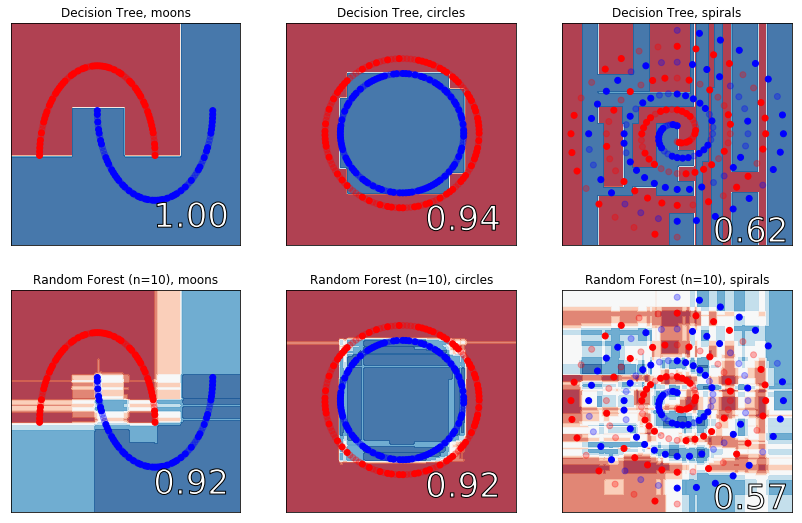

In [18]:
summary_forest()

# Useful Resources

## Data Analysis in Python

+ [Numpy](http://www.numpy.org/) (and [Scipy](https://www.scipy.org/) in general) (with a useful tutorial [here](http://www.scipy-lectures.org/))
+ [Pandas](https://pandas.pydata.org/) provides R-like data frames for Python
+ [Matplotlib](https://matplotlib.org/) is great for plotting and has an interface similar to MATLAB's plotting functions, and [Seaborn](https://seaborn.pydata.org/) provides plotting for statistics specifically

## Machine Learning

+ [Scikit-learn](http://scikit-learn.org/stable/) is an easy place to start if you are just looking to try out a few algorithms and see what happens
+ [Keras](https://keras.io/) is probably the easiest library to pick up for ANNs
+ [TensorFlow](https://www.tensorflow.org/) is very versatile, but can take a bit of time to really get to grips with

<center>
<h1>Thank you for your time!</h1>
</center>